In [1]:
import pandas as pd
from collections import Counter
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hf://datasets/catfang/emosign/emosign_dataset.csv")

/Users/ignazioemanuelepicciche/Documents/TESI Magistrale UCBM/Improved_EmoSign_Thesis/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Step 5: Salvare il dataset con le nuove etichette
if not df.empty:
    # Seleziona solo le colonne 'video_name' e la nuova etichetta di sentiment
    output_df = df[["video_name", "Sentiment"]]

    output_path = "../data/processed/golden_label_emosign.csv"
    output_df.to_csv(output_path, index=False)
    print(
        f"\nDataset con le etichette di sentiment salvato con successo in:\n{output_path}"
    )
    print(
        f"Il file contiene {len(output_df)} righe e le colonne: {list(output_df.columns)}"
    )
else:
    print("\nNessun dato da salvare.")


Dataset con le etichette di sentiment salvato con successo in:
../data/processed/golden_label_emosign.csv
Il file contiene 200 righe e le colonne: ['video_name', 'Sentiment']



Distribuzione delle etichette di sentiment:
- 2: 26 campioni
- -1: 43 campioni
- 3: 38 campioni
- -3: 29 campioni
- -2: 49 campioni
- 0: 3 campioni
- 1: 12 campioni

Grafico salvato in: ../reports/figures/emosign_sentiment_distribution.png


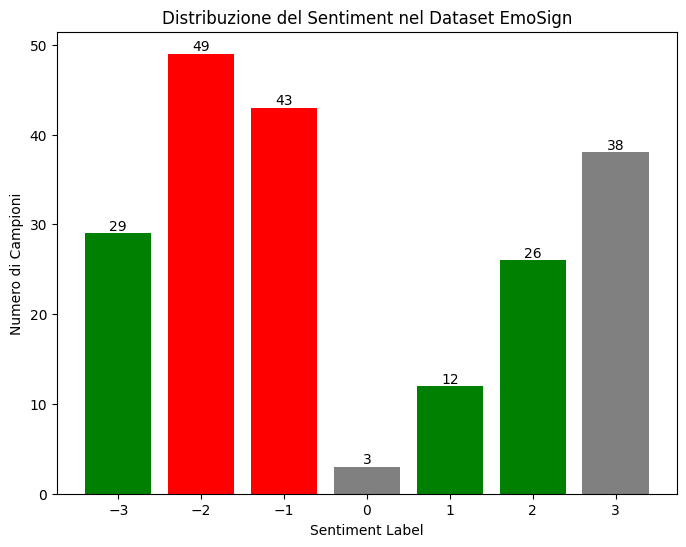

In [4]:
# Step 4: Analizzare e visualizzare la distribuzione
if not df.empty:
    # Conta le occorrenze di ogni etichetta di sentiment
    sentiment_counts = Counter(df["Sentiment"])

    print("\nDistribuzione delle etichette di sentiment:")
    for label, count in sentiment_counts.items():
        print(f"- {label}: {count} campioni")

    # Crea il grafico a barre per visualizzare la distribuzione
    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        sentiment_counts.keys(),
        sentiment_counts.values(),
        color=["green", "red", "gray"],
    )
    plt.title("Distribuzione del Sentiment nel Dataset EmoSign")
    plt.xlabel("Sentiment Label")
    plt.ylabel("Numero di Campioni")

    # Aggiungi il conteggio sopra ogni barra
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
        )

    # Salva l'immagine
    output_folder = "../reports/figures"
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "emosign_sentiment_distribution.png")
    plt.savefig(output_path)

    print(f"\nGrafico salvato in: {output_path}")
    plt.show()
else:
    print("\nNessuna distribuzione da visualizzare.")

In [5]:
# Step 3: Classificare il sentiment
if not df.empty:
    # Funzione per classificare il sentiment in base al punteggio
    def classify_sentiment(score):
        if score > 0:
            return "Positive"
        elif score < 0:
            return "Negative"
        else:
            return "Neutral"

    # Applica la funzione alla colonna 'Sentiment' per creare la nuova etichetta
    df["sentiment_label"] = df["Sentiment"].apply(classify_sentiment)

    df = df[["video_name", "Sentiment", "sentiment_label"]]

    print("\nPrime 5 righe con l'etichetta di sentiment aggiunta:")
    print(df[["video_name", "Sentiment", "sentiment_label"]].head())
else:
    print("\nImpossibile procedere, il DataFrame è vuoto.")


Prime 5 righe con l'etichetta di sentiment aggiunta:
                      video_name  Sentiment sentiment_label
0     10-Ben-Conclusion_24363254          2        Positive
1     10-Ben-Conclusion_24480520         -1        Negative
2     10-Ben-Conclusion_29052074         -1        Negative
3  2-Ben-Voice-Identity_64778101          2        Positive
4  2-Ben-Voice-Identity_65086412         -1        Negative


In [6]:
# salviamo il dataset in output path output_path = "../data/processed/golden_label_emosign.csv"
df.to_csv("../data/processed/golden_label_emosign.csv", index=False)

In [7]:
sentiment_counts = Counter(df["sentiment_label"])

print("\nDistribuzione delle etichette di sentiment:")
for label, count in sentiment_counts.items():
    print(f"- {label}: {count} campioni")


Distribuzione delle etichette di sentiment:
- Positive: 76 campioni
- Negative: 121 campioni
- Neutral: 3 campioni


In [8]:
# MATCHING

In [9]:
# Step 6: Caricare i dataset per il matching
print("--- Caricamento Dataset per il Matching ---")

# 1. Carica il nostro dataset EmoSign con etichette di sentiment
emosign_golden_path = "../data/processed/golden_label_emosign.csv"
try:
    df_emosign_golden = pd.read_csv(emosign_golden_path)
    print(
        f"Dataset '{os.path.basename(emosign_golden_path)}' caricato. Righe: {len(df_emosign_golden)}"
    )
    print(df_emosign_golden.head())
except FileNotFoundError:
    print(f"ERRORE: File non trovato -> {emosign_golden_path}")
    df_emosign_golden = pd.DataFrame()

# 2. Carica il dataset locale con le traduzioni (captions)
local_captions_path = "../data/processed/utterances_with_translations.csv"
try:
    df_local_captions = pd.read_csv(local_captions_path)
    # Rimuovi righe con caption non valide
    df_local_captions.dropna(subset=["caption"], inplace=True)
    df_local_captions = df_local_captions[
        ~df_local_captions["caption"].str.contains(
            "Traduzione non trovata|Translation tag vuota", na=False
        )
    ]
    print(
        f"Dataset '{os.path.basename(local_captions_path)}' caricato e pulito. Righe: {len(df_local_captions)}"
    )
    print(df_local_captions.head())
except FileNotFoundError:
    print(f"ERRORE: File non trovato -> {local_captions_path}")
    df_local_captions = pd.DataFrame()

# Controllo che entrambi i dataset siano stati caricati correttamente
if df_emosign_golden.empty or df_local_captions.empty:
    print("\nERRORE: Uno o entrambi i dataset sono vuoti. Verifica i file di input.")

--- Caricamento Dataset per il Matching ---
Dataset 'golden_label_emosign.csv' caricato. Righe: 200
                      video_name  Sentiment sentiment_label
0     10-Ben-Conclusion_24363254          2        Positive
1     10-Ben-Conclusion_24480520         -1        Negative
2     10-Ben-Conclusion_29052074         -1        Negative
3  2-Ben-Voice-Identity_64778101          2        Positive
4  2-Ben-Voice-Identity_65086412         -1        Negative
Dataset 'utterances_with_translations.csv' caricato e pulito. Righe: 2118
     video_name      Source collection  \
0   2751812.mp4  Cory_2013-6-25_sc0106   
1  98592049.mp4  Cory_2013-6-25_sc0106   
2  98857459.mp4  Cory_2013-6-25_sc0106   
3  98881709.mp4  Cory_2013-6-25_sc0106   
4  98895873.mp4  Cory_2013-6-25_sc0106   

                                             caption  
0            There's something strange about myself.  
1                        I never lived in a house...  
2                             I was born in Flor

In [10]:
# Step 7: Preparare gli ID per il matching
if not df_emosign_golden.empty and not df_local_captions.empty:
    # Estrai ID da EmoSign (es. da 'S01_B_0_0_0_0_0_0_0_1' -> '1')
    df_emosign_golden["utterance_id"] = (
        df_emosign_golden["video_name"].str.split("_").str[-1].astype(str)
    )

    # Estrai ID dal dataset locale (es. da '33748.mp4' -> '33748')
    df_local_captions["utterance_id"] = (
        df_local_captions["video_name"].str.replace(".mp4", "", regex=False).astype(str)
    )

    print("ID estratti con successo da entrambi i dataset.")
    print("\nEsempio ID da EmoSign:")
    print(df_emosign_golden[["video_name", "utterance_id"]].head())
    print("\nEsempio ID dal dataset locale:")
    print(df_local_captions[["video_name", "utterance_id"]].head())
else:
    print("\nImpossibile preparare gli ID, uno dei DataFrame è vuoto.")

ID estratti con successo da entrambi i dataset.

Esempio ID da EmoSign:
                      video_name utterance_id
0     10-Ben-Conclusion_24363254     24363254
1     10-Ben-Conclusion_24480520     24480520
2     10-Ben-Conclusion_29052074     29052074
3  2-Ben-Voice-Identity_64778101     64778101
4  2-Ben-Voice-Identity_65086412     65086412

Esempio ID dal dataset locale:
     video_name utterance_id
0   2751812.mp4      2751812
1  98592049.mp4     98592049
2  98857459.mp4     98857459
3  98881709.mp4     98881709
4  98895873.mp4     98895873


In [11]:
# Step 8: Eseguire il merge e creare il test set finale
if not df_emosign_golden.empty and not df_local_captions.empty:
    # Esegui il merge (inner join) per tenere solo i video in comune
    golden_test_set_df = pd.merge(
        df_local_captions,
        df_emosign_golden,
        on="utterance_id",
        suffixes=("_local", "_emosign"),
    )

    # Rinomina le colonne per il formato finale: video_name, caption, emotion
    golden_test_set_df.rename(
        columns={"video_name_local": "video_name", "sentiment_label": "emotion"},
        inplace=True,
    )

    # Seleziona solo le colonne richieste
    final_columns = ["video_name", "caption", "emotion"]
    golden_test_set_df = golden_test_set_df[final_columns]

    print(f"\nMatching completato. Trovate {len(golden_test_set_df)} corrispondenze.")
    print("\nPrime 5 righe del Golden Test Set finale:")
    print(golden_test_set_df.head())

else:
    print("\nImpossibile eseguire il merge, dati mancanti.")
    golden_test_set_df = pd.DataFrame()


Matching completato. Trovate 200 corrispondenze.

Prime 5 righe del Golden Test Set finale:
     video_name                                            caption   emotion
0  83664512.mp4  I was like, “Oh, wow, that`s fine.” He wanted ...  Positive
1     25328.mp4  There are so many things that are wrong with t...  Negative
2    253715.mp4  Then they would ask the HIT group about the ca...  Negative
3    255438.mp4  Or they will ask another group SMASHED about t...  Negative
4    253816.mp4  Or ask the COLLIDED group about the car and if...  Negative


In [12]:
# Step 9: Salvare il Golden Test Set
if not golden_test_set_df.empty:
    output_path = "../data/processed/golden_test_set.csv"
    golden_test_set_df.to_csv(output_path, index=False)
    print(f"\nGolden Test Set salvato con successo in:\n{output_path}")

    # Visualizza la distribuzione del sentiment nel test set finale
    final_counts = Counter(golden_test_set_df["emotion"])
    print("\nDistribuzione del sentiment nel test set finale:")
    for label, count in final_counts.items():
        print(f"- {label}: {count} campioni")
else:
    print("\nNessun dato da salvare.")


Golden Test Set salvato con successo in:
../data/processed/golden_test_set.csv

Distribuzione del sentiment nel test set finale:
- Positive: 76 campioni
- Negative: 121 campioni
- Neutral: 3 campioni
